In [2]:
!pip install yfinance


In [2]:
#the dataset we will use here to perform the analysis and build a predictive model is Tesla Stock Price data. We will use OHLC(‘Open’, ‘High’, ‘Low’, ‘Close’) data from 1st January 2020 to 31 december 2022 which is for 2 year for the Tesla stocks.

import yfinance as yf
# Get Tesla stock data for a specific date range
tsla = yf.Ticker("TSLA").history(start="2020-01-01", end="2023-01-01")
print(tsla)


                                 Open        High         Low       Close  \
Date                                                                        
2020-01-02 00:00:00-05:00   28.299999   28.713333   28.114000   28.684000   
2020-01-03 00:00:00-05:00   29.366667   30.266666   29.128000   29.534000   
2020-01-06 00:00:00-05:00   29.364668   30.104000   29.333332   30.102667   
2020-01-07 00:00:00-05:00   30.760000   31.441999   30.224001   31.270666   
2020-01-08 00:00:00-05:00   31.580000   33.232666   31.215334   32.809334   
...                               ...         ...         ...         ...   
2022-12-23 00:00:00-05:00  126.370003  128.619995  121.019997  123.150002   
2022-12-27 00:00:00-05:00  117.500000  119.669998  108.760002  109.099998   
2022-12-28 00:00:00-05:00  110.349998  116.269997  108.239998  112.709999   
2022-12-29 00:00:00-05:00  120.389999  123.570000  117.500000  121.820000   
2022-12-30 00:00:00-05:00  119.949997  124.480003  119.750000  123.180000   

In [4]:
tsla.shape

(756, 7)

In [ ]:
###From this, we got to know that there are 756 rows of data available and for each row, we have 7 different features (columns).

In [4]:
#Before moving further let’s check for the null values if any are present in the data frame.
tsla = yf.Ticker("TSLA").history(start="2020-01-01", end="2023-01-01")
tsla.isnull().sum()
####This implies that there are no null values in the data set provided.

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [ ]:
#Exploratory Data Analysis        ###    EDA    ###


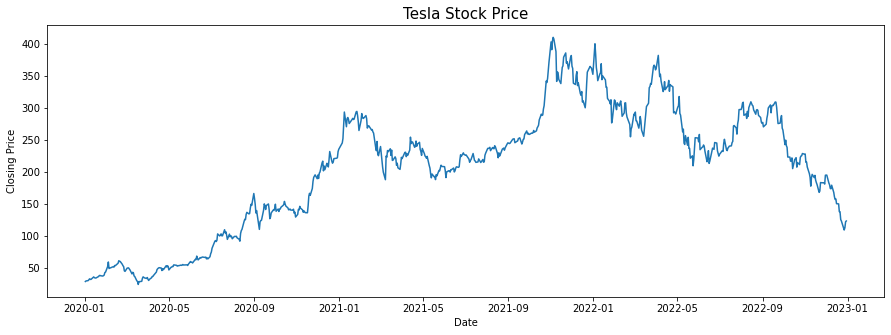

In [14]:
import matplotlib.pyplot as plt

# Plot the closing prices
plt.figure(figsize=(15,5))
plt.plot(tsla['Close'])

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Tesla Stock Price", fontsize=15)

# Show the plot
plt.show()




In [15]:
!pip install mplfinance


In [16]:
!pip install plotly


In [17]:
import plotly.graph_objs as go
import yfinance as yf

tsla = yf.Ticker("TSLA").history(start="2020-01-01", end="2023-01-01")

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=tsla.index,
                                      open=tsla['Open'],
                                      high=tsla['High'],
                                      low=tsla['Low'],
                                      close=tsla['Close'])])
# Add title and axis labels
fig.update_layout(title='Tesla Stock Price',
                  yaxis_title='Stock Price',
                  xaxis_title='Date')

# Show the chart
fig.show()


In [ ]:
                                       ########       LSTM       #########

In [ ]:
# 2 steps : 1-train the model -2- test the model

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense



In [6]:
#Sort the dataset on date time and filter “Date” and “Close” columns:
tsla = yf.Ticker("TSLA").history(start="2020-01-01", end="2023-01-01")
data=tsla.sort_index(ascending=True,axis=0)
close_dataset=pd.DataFrame(index=range(0,len(tsla)),columns=['Date','Close'])

for i in range(0,len(data)):

    close_dataset["Date"][i] = data.index[i].strftime('%Y-%m-%d')
    close_dataset["Close"][i] = data["Close"][i]
print(close_dataset)

           Date       Close
0    2020-01-02      28.684
1    2020-01-03      29.534
2    2020-01-06   30.102667
3    2020-01-07   31.270666
4    2020-01-08   32.809334
..          ...         ...
751  2022-12-23  123.150002
752  2022-12-27  109.099998
753  2022-12-28  112.709999
754  2022-12-29      121.82
755  2022-12-30      123.18

[756 rows x 2 columns]


In [7]:
close_dataset.drop("Date",axis=1,inplace=True)
print(close_dataset)

          Close
0        28.684
1        29.534
2     30.102667
3     31.270666
4     32.809334
..          ...
751  123.150002
752  109.099998
753  112.709999
754      121.82
755      123.18

[756 rows x 1 columns]


In [8]:
# normalize the new filtered data set:
## LSTM are sensetive to the scale of the data so we apply MinMax scaler:
###transform the values to an array: 

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
close_dataset= scaler.fit_transform(np.array(close_dataset).reshape(-1,1))

print(close_dataset)

close_dataset.shape





[[0.01192745]
 [0.01413016]
 [0.01560381]
 [0.01863059]
 [0.02261792]
 [0.0207521 ]
 [0.02020099]
 [0.02827067]
 [0.03052694]
 [0.02717191]
 [0.02630638]
 [0.02578982]
 [0.03213016]
 [0.03599312]
 [0.0364492 ]
 [0.03517422]
 [0.03399944]
 [0.03553356]
 [0.03796777]
 [0.04830237]
 [0.04998851]
 [0.07234902]
 [0.09084485]
 [0.06452293]
 [0.06698651]
 [0.06683275]
 [0.07084254]
 [0.0713781 ]
 [0.07015323]
 [0.07649529]
 [0.07580943]
 [0.08589351]
 [0.09608989]
 [0.09297846]
 [0.09325315]
 [0.08164185]
 [0.07578869]
 [0.0721417 ]
 [0.05490012]
 [0.05299801]
 [0.06606397]
 [0.06639048]
 [0.0670798 ]
 [0.06276767]
 [0.05912932]
 [0.04263406]
 [0.04908324]
 [0.04716559]
 [0.03443653]
 [0.03202997]
 [0.01448604]
 [0.01191708]
 [0.        ]
 [0.01147481]
 [0.01145581]
 [0.01262368]
 [0.02483964]
 [0.03075671]
 [0.02884079]
 [0.02645669]
 [0.02434381]
 [0.0281221 ]
 [0.02079011]
 [0.01611   ]
 [0.02052233]
 [0.02678147]
 [0.03182784]
 [0.03241349]
 [0.03658741]
 [0.05005416]
 [0.06023672]
 [0.06

(756, 1)

In [10]:
#spliting dataset into train and test split:
training_size= int(len(close_dataset)*0.65) # 65% 
test_size=len(close_dataset)- training_size
train=close_dataset[0:training_size:,]
test= close_dataset[training_size:len(close_dataset),:1]
len(train),len(test)


(491, 265)

In [13]:
#convert an array of values into a dataset matrix:
import numpy as np
def create_dataset(dataset, time_step=1):
    x, y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        x.append(a)
        y.append(dataset[i + time_step, 0])
    return np.array(x), np.array(y)


In [14]:
#reshape into x=t, t+1,t+2,t+3 and y=t+4
time_step = 100
x_train, y_train = create_dataset(train, time_step)
x_test, y_test = create_dataset(test, time_step)
print(x_train)

[[0.01192745 0.01413016 0.01560381 ... 0.08057246 0.07872046 0.07906425]
 [0.01413016 0.01560381 0.01863059 ... 0.07872046 0.07906425 0.07929921]
 [0.01560381 0.01863059 0.02261792 ... 0.07906425 0.07929921 0.076808  ]
 ...
 [0.49407689 0.49580448 0.50813967 ... 0.87448018 0.81433332 0.80918504]
 [0.49580448 0.50813967 0.5036392  ... 0.81433332 0.80918504 0.84610417]
 [0.50813967 0.5036392  0.49843046 ... 0.80918504 0.84610417 0.86097028]]


In [16]:
#reshape 
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
print(x_train)

[[[0.01192745]
  [0.01413016]
  [0.01560381]
  ...
  [0.08057246]
  [0.07872046]
  [0.07906425]]

 [[0.01413016]
  [0.01560381]
  [0.01863059]
  ...
  [0.07872046]
  [0.07906425]
  [0.07929921]]

 [[0.01560381]
  [0.01863059]
  [0.02261792]
  ...
  [0.07906425]
  [0.07929921]
  [0.076808  ]]

 ...

 [[0.49407689]
  [0.49580448]
  [0.50813967]
  ...
  [0.87448018]
  [0.81433332]
  [0.80918504]]

 [[0.49580448]
  [0.50813967]
  [0.5036392 ]
  ...
  [0.81433332]
  [0.80918504]
  [0.84610417]]

 [[0.50813967]
  [0.5036392 ]
  [0.49843046]
  ...
  [0.80918504]
  [0.84610417]
  [0.86097028]]]


In [17]:
#build LSTM
from keras.models import Sequential
from keras.layers import LSTM, Dense

lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
lstm_model.add(LSTM(50, return_sequences=True))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')


In [18]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
x_train[:100]

array([[[0.01192745],
        [0.01413016],
        [0.01560381],
        ...,
        [0.08057246],
        [0.07872046],
        [0.07906425]],

       [[0.01413016],
        [0.01560381],
        [0.01863059],
        ...,
        [0.07872046],
        [0.07906425],
        [0.07929921]],

       [[0.01560381],
        [0.01863059],
        [0.02261792],
        ...,
        [0.07906425],
        [0.07929921],
        [0.076808  ]],

       ...,

       [[0.08057246],
        [0.07872046],
        [0.07906425],
        ...,
        [0.30550779],
        [0.31248738],
        [0.31965697]],

       [[0.07872046],
        [0.07906425],
        [0.07929921],
        ...,
        [0.31248738],
        [0.31965697],
        [0.32341452]],

       [[0.07906425],
        [0.07929921],
        [0.076808  ],
        ...,
        [0.31965697],
        [0.32341452],
        [0.33606929]]])

In [19]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
lstm_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=64, verbose=1)


Epoch 1/100
7/7 [==============================] - 9s 325ms/step - loss: 0.1657 - val_loss: 0.0291
Epoch 2/100
7/7 [==============================] - 1s 133ms/step - loss: 0.0262 - val_loss: 0.0118
Epoch 3/100
7/7 [==============================] - 1s 150ms/step - loss: 0.0209 - val_loss: 0.0080
Epoch 4/100
7/7 [==============================] - 1s 142ms/step - loss: 0.0099 - val_loss: 0.0196
Epoch 5/100
7/7 [==============================] - 1s 148ms/step - loss: 0.0080 - val_loss: 0.0062
Epoch 6/100
7/7 [==============================] - 1s 129ms/step - loss: 0.0070 - val_loss: 0.0080
Epoch 7/100
7/7 [==============================] - 1s 130ms/step - loss: 0.0052 - val_loss: 0.0106
Epoch 8/100
7/7 [==============================] - 1s 142ms/step - loss: 0.0046 - val_loss: 0.0064
Epoch 9/100
7/7 [==============================] - 1s 140ms/step - loss: 0.0042 - val_loss: 0.0086
Epoch 10/100
7/7 [==============================] - 1s 138ms/step - loss: 0.0038 - val_loss: 0.0077
Epoch 11/

In [20]:
#the prediction
train_predict = lstm_model.predict(x_train)
test_predict = lstm_model.predict(x_test)

#transform back to the original form:
train_predict = scaler.inverse_transform(train_predict)

test_predict = scaler.inverse_transform(test_predict)


6/6 [==============================] - 0s 25ms/step


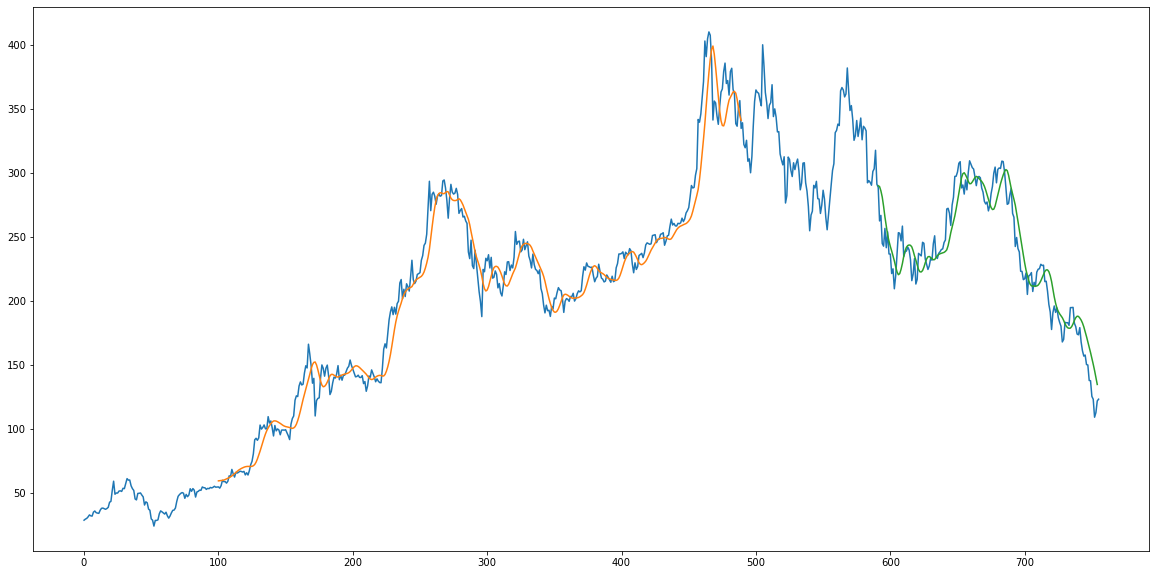

In [21]:
import numpy as np
look_back=100

trainpredictplot = np.empty_like(close_dataset)
trainpredictplot[:, :]= np.nan
trainpredictplot[look_back:len(train_predict)+look_back, :] = train_predict

testpredictplot= np.empty_like(close_dataset)
testpredictplot[:, :]= np.nan

testpredictplot[len(train_predict)+(look_back*2)+1:len(close_dataset)-1, :] = test_predict.reshape(-1, 1)


plt.plot(scaler.inverse_transform(close_dataset))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()


In [ ]:
########   the LSTM has predicted stocks almost similar to actual stocks.

In [122]:
lstm_model.save("lstm_model.h5")

In [59]:
close_dataset = close_dataset.reshape((-1))
print(close_dataset)

[0.01192745 0.01413016 0.01560381 0.01863059 0.02261792 0.0207521
 0.02020099 0.02827067 0.03052694 0.02717191 0.02630638 0.02578982
 0.03213016 0.03599312 0.0364492  0.03517422 0.03399944 0.03553356
 0.03796777 0.04830237 0.04998851 0.07234902 0.09084485 0.06452293
 0.06698651 0.06683275 0.07084254 0.0713781  0.07015323 0.07649529
 0.07580943 0.08589351 0.09608989 0.09297846 0.09325315 0.08164185
 0.07578869 0.0721417  0.05490012 0.05299801 0.06606397 0.06639048
 0.0670798  0.06276767 0.05912932 0.04263406 0.04908324 0.04716559
 0.03443653 0.03202997 0.01448604 0.01191708 0.         0.01147481
 0.01145581 0.01262368 0.02483964 0.03075671 0.02884079 0.02645669
 0.02434381 0.0281221  0.02079011 0.01611    0.02052233 0.02678147
 0.03182784 0.03241349 0.03658741 0.05005416 0.06023672 0.06368158
 0.06633865 0.06783822 0.06653732 0.05623384 0.06407548 0.05950075
 0.06287306 0.0755883  0.07046937 0.07589235 0.07267381 0.05875615
 0.06909937 0.07031216 0.07279475 0.07235593 0.07915927 0.07775

In [31]:
close_dataset = close_dataset.reshape((-1))
look_back=100

def predict(num_prediction, lstm_model):
    prediction_list = close_dataset[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = lstm_model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list


num_prediction = 30
forecast = predict(num_prediction, lstm_model)

print(forecast)


1/1 [==============================] - 0s 26ms/step
[0.25680637 0.26515317 0.25921106 0.25608486 0.25501752 0.25530237
 0.25638941 0.25789961 0.25959757 0.26135123 0.26309484 0.26480088
 0.2664609  0.26807451 0.26964387 0.27117115 0.27265793 0.27410528
 0.27551448 0.27688655 0.27822331 0.27952677 0.28079924 0.28204325
 0.28326136 0.28445619 0.28563032 0.28678605 0.28792545 0.28905061
 0.29016322]


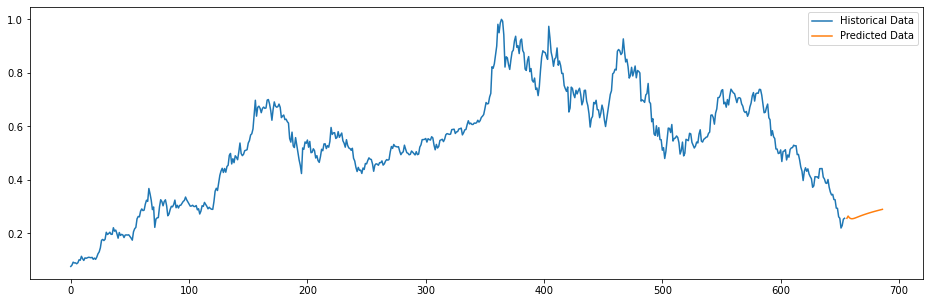

In [32]:
#prediction visualisation

import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))
plt.plot(close_dataset[-655:], label='Historical Data')
plt.plot(range(len(close_dataset)-100, len(close_dataset)+num_prediction-99), forecast, label='Predicted Data')

plt.legend()
plt.show()

